# IRIS Classifier Model


#### Understand the problem statement

As a Data Scientist,We all of us have the indepth knowledge of Iris Dataset.The Data Set contains 3 classes of 50 instances of each,where each class refers to species of iris flower.The main objective of the problem statement is to build a classifier model by using advance data science techniques.Here I am trying play with different algorithms and its parameters to maximize the accuracy of model.

#### Attribute Information:

Id----> Id represents each record uniquely(int)

SepalLengthCm---->Sepal lenght in centimeter(float)

SepalWidthCm---->Sepal Width in centimeter(float)

PetalLengthCm---->Peatal lenght in cm(float)

PetalWidthCm---->Petal width in cm(float)

Species----> Types of species of iris flower like setosa,versicolor,verginica(object)

In [1]:
from IPython.display import Image
Image(url='https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png', width=500)

### Load necessary liabraries to execute solution

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xg
from sklearn.model_selection import train_test_split


In [3]:
#load and make the copy of Iris dataset to keep track of changes.
df = pd.read_csv('Iris.csv') #read comma seperated values
df_copy=df.copy() #copy dataset

In [4]:
#fetch first five rows from dataset
df_copy

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#### Check data properties and Data cleaning or preprocessing

In [5]:
#Remove unnecessary feat from dataset Id
df_copy.drop(columns=['Id'],axis=0,inplace=True)


In [6]:
#Check datatypes of each feat
df_copy.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
#check number of records and feilds present in dataset
df_copy.shape
print('Rows ---->',df.shape[0])
print('Columns ---->',df.shape[1])

Rows ----> 150
Columns ----> 6


In [8]:
#see the descriptive statistics
df_copy.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#check the space complexicity taken by data
df_copy.size

750

In [10]:
#checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df_copy.columns = ['sl','sw','pl','pw','species']
df_split_iris=df_copy.species.str.split('-',n=-1,expand=True) #Remove prefix 'Iris-' from species col
df_split_iris.drop(columns=0,axis=1,inplace=True)#Drop 'Iris-' col
df_split_iris

,1
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [12]:
df3_full=df_copy.join(df_split_iris)
df3_full

,sl,sw,pl,pw,species,1
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,virginica


In [13]:
df3_full.rename({1:'species1'},axis=1,inplace=True) #Rename column
df3_full

,sl,sw,pl,pw,species,species1
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,virginica


In [14]:
df3_full.drop(columns='species',axis=1,inplace=True) #Drop excessive column

In [15]:
#final dataframe
df3_full

,sl,sw,pl,pw,species1
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [16]:
df3_full.shape #check propertise like shape

(150, 5)

In [17]:
#check for missing entries
df3_full.isna() 

,sl,sw,pl,pw,species1
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [18]:
#In each feat,count of missing entries
df3_full.isna().sum()

sl          0
sw          0
pl          0
pw          0
species1    0
dtype: int64

In [19]:
df3_full.corr() # check the correlation matrix


C:\Users\AMOL MORE\AppData\Local\Temp\ipykernel_16272\290910695.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3_full.corr() # check the correlation matrix


,sl,sw,pl,pw
sl,1.000000,-0.109369,0.871754,0.817954
sw,-0.109369,1.000000,-0.420516,-0.356544
pl,0.871754,-0.420516,1.000000,0.962757
pw,0.817954,-0.356544,0.962757,1.000000


In [20]:
#statistical description of numerical  data only
df3_full.describe()


,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
#categoriwise frequency of data
df3_full.species1.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species1, dtype: int64

#### Data Visualisation and gain meaningfull insights from data

<Axes: xlabel='species1', ylabel='sl'>

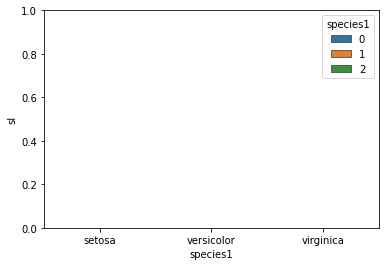

In [22]:
sns.boxplot(x=df3_full.species1,y=df3_full.sl,data=df3_full,hue=df3_full.species1,hue_order=[0,1,2])

<Axes: xlabel='species1', ylabel='sw'>

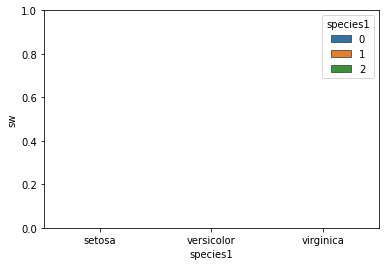

In [23]:
sns.boxplot(x=df3_full.species1,y=df3_full.sw,data=df3_full,hue=df3_full.species1,hue_order=[0,1,2])

<Axes: xlabel='species1', ylabel='pl'>

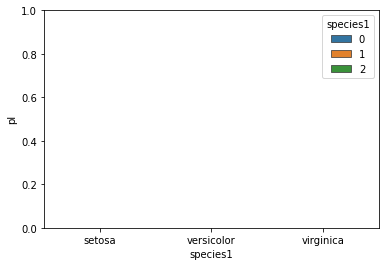

In [24]:
sns.boxplot(x=df3_full.species1,y=df3_full.pl,data=df3_full,hue=df3_full.species1,hue_order=[0,1,2])

<Axes: xlabel='species1', ylabel='pw'>

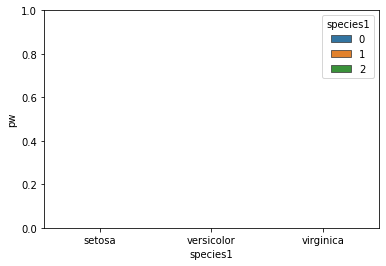

In [25]:
sns.boxplot(x=df3_full.species1,y=df3_full.pw,data=df3_full,hue=df3_full.species1,hue_order=[0,1,2])

<Axes: xlabel='sl', ylabel='pl'>

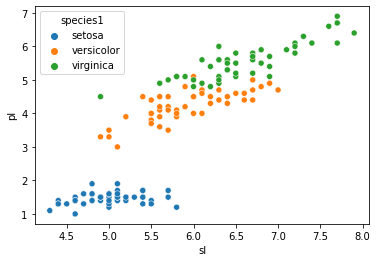

In [26]:
sns.scatterplot(x=df3_full.sl,y=df3_full.pl,hue=df3_full.species1)

The above graph shows relationship between the sepal length and width.It also shows that species setosa having lesser petal lenght as compared to versicolor and verginica.

Now we will check relationship between the petal length and width.

<Axes: xlabel='pl', ylabel='pw'>

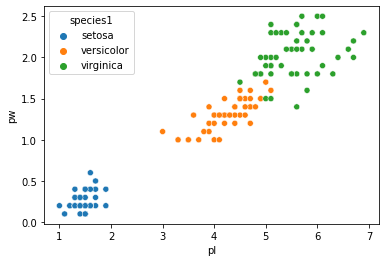

In [27]:
sns.scatterplot(x=df3_full.pl,y=df3_full.pw,hue=df3_full.species1)

As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. We will check that later.

<Axes: xlabel='sl', ylabel='pw'>

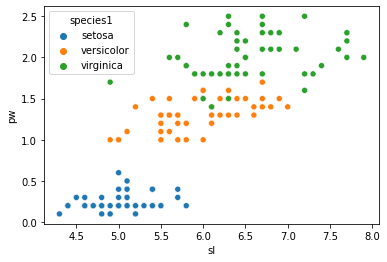

In [28]:
sns.scatterplot(x=df3_full.sl,y=df3_full.pw,hue=df3_full.species1)

<Axes: xlabel='sw', ylabel='pl'>

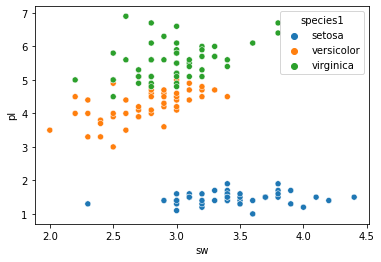

In [29]:
sns.scatterplot(x=df3_full.sw,y=df3_full.pl,hue=df3_full.species1)

From both above scatter plots we can clearly see that sw and pl data distribution and not represents specific pattern

In [30]:
df3_full.columns # check column names

Index(['sl', 'sw', 'pl', 'pw', 'species1'], dtype='object')

C:\Users\AMOL MORE\AppData\Local\Temp\ipykernel_16272\1655984317.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_full.pl)


<Axes: xlabel='pl', ylabel='Density'>

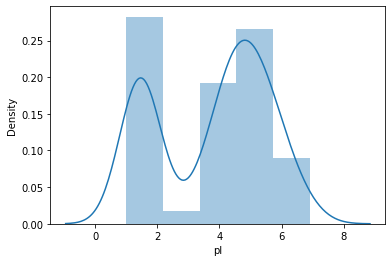

In [31]:
sns.distplot(df3_full.pl)

C:\Users\AMOL MORE\AppData\Local\Temp\ipykernel_16272\437811181.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_full.sl)


<Axes: xlabel='sl', ylabel='Density'>

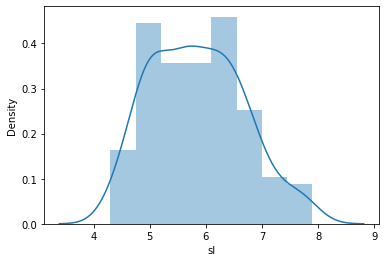

In [32]:
sns.distplot(df3_full.sl)

C:\Users\AMOL MORE\AppData\Local\Temp\ipykernel_16272\370837299.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_full.sw)


<Axes: xlabel='sw', ylabel='Density'>

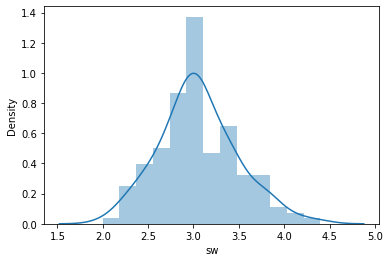

In [33]:
sns.distplot(df3_full.sw)

C:\Users\AMOL MORE\AppData\Local\Temp\ipykernel_16272\3832971569.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_full.pw)


<Axes: xlabel='pw', ylabel='Density'>

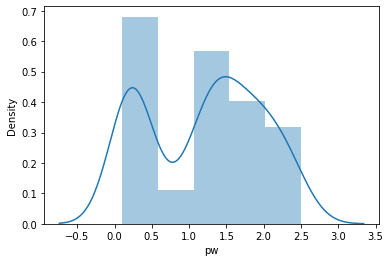

In [34]:
sns.distplot(df3_full.pw)

<Axes: xlabel='species1', ylabel='sw'>

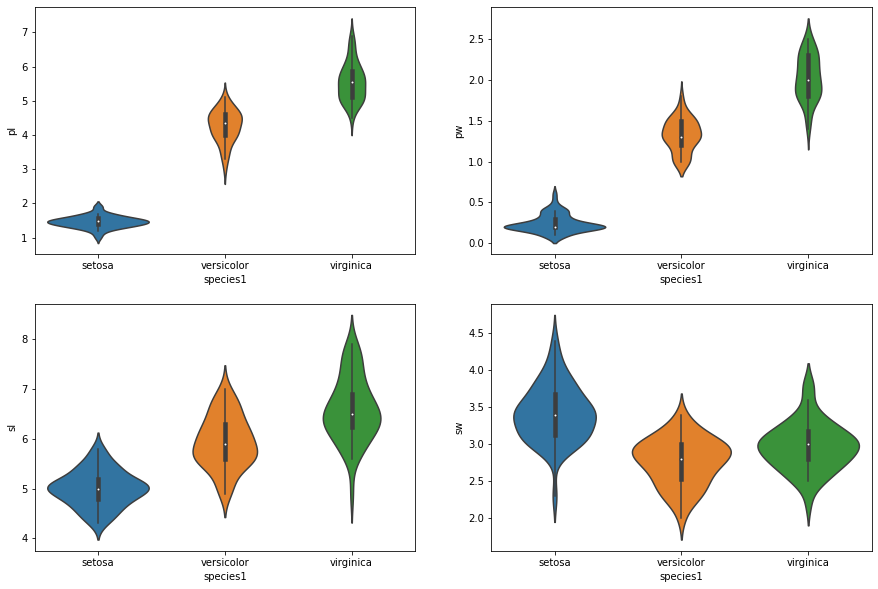

In [35]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species1',y='pl',data=df3_full)
plt.subplot(2,2,2)
sns.violinplot(x='species1',y='pw',data=df3_full)
plt.subplot(2,2,3)
sns.violinplot(x='species1',y='sl',data=df3_full)
plt.subplot(2,2,4)
sns.violinplot(x='species1',y='sw',data=df3_full)

C:\Users\AMOL MORE\AppData\Local\Temp\ipykernel_16272\1479841762.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df3_full.corr(),annot=True,cmap='cubehelix_r')


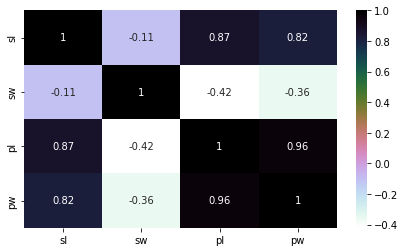

In [36]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df3_full.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

Observation--->

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. 
Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

#### convert categorical features into numerical feature

In [37]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
le.fit_transform(df3_full['species1'])
df3_full['species1']=le.fit_transform(df3_full['species1'])
df3_full

,sl,sw,pl,pw,species1
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [38]:
df3_full

,sl,sw,pl,pw,species1
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### Devide independent feat and target feat to train model

In [39]:
x = df3_full.iloc[:,:-1]
x

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
y = df3_full.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species1, Length: 150, dtype: int32

In [41]:
df3_full.species1.unique()

array([0, 1, 2])

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=20)

In [43]:
xtrain.shape

(105, 4)

In [44]:
ytrain.shape

(105,)

In [45]:
xtest.shape

(45, 4)

In [46]:
ytest.shape

(45,)

#### Train model with LR,DT,RFC,XGBOOST,RF,KNN of classification techniques

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
logi = LogisticRegression()
logi.fit(xtrain,ytrain)
logi_prediction = logi.predict(xtest)
logi_prediction

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 0, 1,
       1])

In [48]:
print(logi.score(xtrain,ytrain)*100)
print(logi.score(xtest,ytest)*100)

97.14285714285714
93.33333333333333


In [49]:
accuracy_score(ytest,logi_prediction)*100

93.33333333333333

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
para = {'penalty':['l1','l2','elasticnet'],
        'C':[1,2,3,4,5,6,10,20,30,40,50,1.5,2.3,1.6,1.9],
        'max_iter':[100,200,300,50,70,60,50]
        }

In [52]:
classifier_logistic = GridSearchCV(logi,param_grid = para,scoring='accuracy',cv=5)

In [53]:
classifier_logistic.fit(xtrain,ytrain)

C:\Users\AMOL MORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AMOL MORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50, 1.5, 2.3,
                               1.6, 1.9],
                         'max_iter': [100, 200, 300, 50, 70, 60, 50],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [54]:
classifier_logistic.best_estimator_

LogisticRegression(C=20, max_iter=50)

In [55]:
classifier_logistic.best_params_

{'C': 20, 'max_iter': 50, 'penalty': 'l2'}

In [56]:
classifier_logistic.best_score_

0.9714285714285715

In [57]:
prediction = classifier_logistic.predict(xtest)
prediction

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1,
       1])

In [58]:
from sklearn.metrics import accuracy_score,classification_report
grid_logi_accuracy_score1 = accuracy_score(ytest,prediction)
grid_logi_accuracy_score1=(np.round(grid_logi_accuracy_score1*100))
grid_logi_accuracy_score1

91.0

In [59]:
confusion_matrix(ytest,prediction)

array([[13,  0,  0],
       [ 0, 18,  0],
       [ 0,  4, 10]], dtype=int64)

In [60]:
class_pre_rec = classification_report(ytest,prediction)
print(class_pre_rec)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.82      1.00      0.90        18
           2       1.00      0.71      0.83        14

    accuracy                           0.91        45
   macro avg       0.94      0.90      0.91        45
weighted avg       0.93      0.91      0.91        45



In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
tree_classifier = DecisionTreeClassifier(criterion='gini',
    splitter='best', 
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=1,
    random_state=1,
    max_leaf_nodes=2,
    class_weight='balanced',
    ccp_alpha=0.01,)

In [63]:
tree_classifier.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', max_depth=5,
                       max_features=1, max_leaf_nodes=2, random_state=1)

In [64]:
tree_classifier.score(xtrain,ytrain)

0.6571428571428571

In [65]:
tree_classifier.score(xtest,ytest)

0.6888888888888889

In [66]:
tree_classifier.predict(xtest)

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1])

In [67]:
tree_pred=tree_classifier.predict(xtest)

In [68]:
from sklearn.metrics import confusion_matrix,classification_report

In [69]:
confusion_matrix(ytest,tree_pred)

array([[13,  0,  0],
       [ 0, 18,  0],
       [ 0, 14,  0]], dtype=int64)

In [70]:
print(classification_report(ytest,tree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.56      1.00      0.72        18
           2       0.00      0.00      0.00        14

    accuracy                           0.69        45
   macro avg       0.52      0.67      0.57        45
weighted avg       0.51      0.69      0.58        45



C:\Users\AMOL MORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AMOL MORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AMOL MORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [71]:
import sklearn

In [72]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [73]:
param_dict = {"criterion":['gini','entropy'],"max_depth":[1,2,3,4,5,6,7,None]}

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
grid = GridSearchCV(tree_classifier,param_grid=param_dict,n_jobs=-1)
grid

GridSearchCV(estimator=DecisionTreeClassifier(ccp_alpha=0.01,
                                              class_weight='balanced',
                                              max_depth=5, max_features=1,
                                              max_leaf_nodes=2,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [76]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(ccp_alpha=0.01,
                                              class_weight='balanced',
                                              max_depth=5, max_features=1,
                                              max_leaf_nodes=2,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [77]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [78]:
grid.best_score_

0.6761904761904761

In [79]:
grid_pred2=grid.predict(xtest)

In [80]:
accuracy_score(ytest,grid_pred2)*100

68.88888888888889

In [81]:
from sklearn.metrics import confusion_matrix,classification_report

In [82]:
confusion_matrix(ytest,grid_pred2)

array([[13,  0,  0],
       [ 0, 18,  0],
       [ 0, 14,  0]], dtype=int64)

In [83]:
print(classification_report(ytest,grid_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.56      1.00      0.72        18
           2       0.00      0.00      0.00        14

    accuracy                           0.69        45
   macro avg       0.52      0.67      0.57        45
weighted avg       0.51      0.69      0.58        45



C:\Users\AMOL MORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AMOL MORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AMOL MORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn = KNeighborsClassifier(n_neighbors=5,
    weights='uniform',
    algorithm='kd_tree',
    leaf_size=30,
    p=2,
    metric='minkowski',
    n_jobs=-1)

In [86]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1)

In [87]:
knn.score(xtrain,ytrain)

0.9809523809523809

In [88]:
knn.score(xtest,ytest)

0.9555555555555556

In [89]:
knn_pred=knn.predict(xtest)

In [90]:
accuracy_score(ytest,knn_pred)

0.9555555555555556

In [91]:
confusion_matrix(ytest,knn_pred)

array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 13]], dtype=int64)

In [92]:
accuracy_score(ytest,knn_pred)

0.9555555555555556

In [93]:
print(classification_report(ytest,knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        18
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
RFC=RandomForestClassifier(n_estimators=300,criterion='gini',
    max_depth=17,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_leaf_nodes=2,
    min_impurity_decrease=0.1,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=1,
    ccp_alpha=0.01,
    max_samples=3)

In [96]:
RFC.fit(xtrain,ytrain)

RandomForestClassifier(ccp_alpha=0.01, max_depth=17, max_leaf_nodes=2,
                       max_samples=3, min_impurity_decrease=0.1,
                       n_estimators=300, n_jobs=-1, random_state=1)

In [97]:
RFC.score(xtrain,ytrain)

0.9333333333333333

In [98]:
RFC.score(xtest,ytest)

0.7777777777777778

In [99]:
RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 17,
 'max_features': 'sqrt',
 'max_leaf_nodes': 2,
 'max_samples': 3,
 'min_impurity_decrease': 0.1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [100]:
RFC_pred = RFC.predict(xtest)

In [101]:
accuracy_score(ytest,RFC_pred)

0.7777777777777778

In [102]:
confusion_matrix(ytest,RFC_pred)

array([[13,  0,  0],
       [ 0, 10,  8],
       [ 0,  2, 12]], dtype=int64)

In [103]:
print(classification_report(ytest,RFC_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.83      0.56      0.67        18
           2       0.60      0.86      0.71        14

    accuracy                           0.78        45
   macro avg       0.81      0.80      0.79        45
weighted avg       0.81      0.78      0.78        45



In [104]:
import xgboost as xg

In [105]:
xg_model = xg.XGBClassifier(gamma=0.01,
              learning_rate=0.01, max_bin=4,
              max_depth=15,
              max_leaves=2, min_child_weight=2,n_estimators=300, n_jobs=-1,objective='multi:softprob',
             random_state=1)

In [106]:
xg_model.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=4,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=2,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [107]:
xg_model.score(xtrain,ytrain)

0.9904761904761905

In [108]:
xg_model.score(xtest,ytest)

0.8888888888888888

In [109]:
xg_pred =xg_model.predict(xtest)

In [110]:
accuracy_score(ytest,xg_pred)

0.8888888888888888

In [111]:
confusion_matrix(ytest,xg_pred)

array([[13,  0,  0],
       [ 0, 18,  0],
       [ 0,  5,  9]], dtype=int64)

In [112]:
print(classification_report(ytest,xg_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.78      1.00      0.88        18
           2       1.00      0.64      0.78        14

    accuracy                           0.89        45
   macro avg       0.93      0.88      0.89        45
weighted avg       0.91      0.89      0.88        45



Observations:

Using Petals over Sepal for training the data gives a much better accuracy. This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high. Thus we have just implemented some of the common Machine Learning. Since the dataset is small with very few features, I didn't cover some concepts as they would be relevant when we have many features.

I have compiled a notebook covering some advanced ML concepts using a larger dataset. Have a look at that tooo.

In above experiment,we have seen different accuracy with respect to different models like Logistic Regression,Decision Tree,Random Forest,XgBoost and KNN Among all of them KNN provide best accuracy for the small dataset.So I will consider KNN as my final model having train and test are 98% and 95%. As I mensioned I also play some hyperparameters for all models.
